# Random Forest

## Load data

In [108]:
import pandas as pd

df = pd.read_csv('data/diabetes.csv')

## Data analysis

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [110]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [111]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [112]:
cl = 'Outcome'

y = df[cl]
X = df.drop(cl, axis=1)

X.corrwith(y).abs().sort_values(ascending=False)

Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
dtype: float64

The two features with the highest absolute correlation with the target __Outcome__ are __Glucose__ and __BMI__.

## Model Training

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

features = ['Glucose', 'BMI']
X = df[features]
y = df[cl]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

0.7142857142857143

## Decision Surface

/home/vornic/.local/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


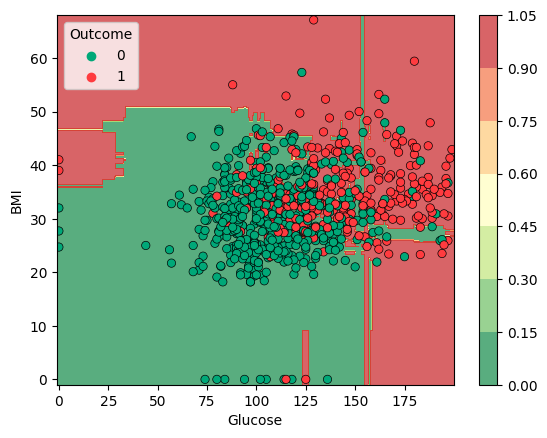

In [114]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Bounds of the domain
min1, max1 = X['Glucose'].min() - 1, X['Glucose'].max() + 1
min2, max2 = X['BMI'].min() - 1, X['BMI'].max() + 1

x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)
xx, yy = np.meshgrid(x1grid, x2grid)

r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
grid = np.hstack((r1, r2))

y_pred = model.predict(grid)
zz = y_pred.reshape(xx.shape)

c = plt.contourf(xx, yy, zz, cmap='RdYlGn_r', alpha=0.7)
plt.colorbar(c)
sns.set_palette(['#00A878', '#FF3B3F'])
sns.scatterplot(x='Glucose', y='BMI', hue=cl, data=df, edgecolor='k')

plt.show()

### Conclusion

Compared to the decision boundary of the decison tree classifier, the one of the random forest classifier is more accurate. This is because the random forest classifier is an ensemble of decision trees, and each decision tree is trained on a random subset of the data. 

Due to the nature of the data, the model has some trouble classifying the data points in some areas. This is because the data points in these areas are very close to the decision boundary, while others are far away. 

## Decision Tree Model

### Hyperparameter tuning

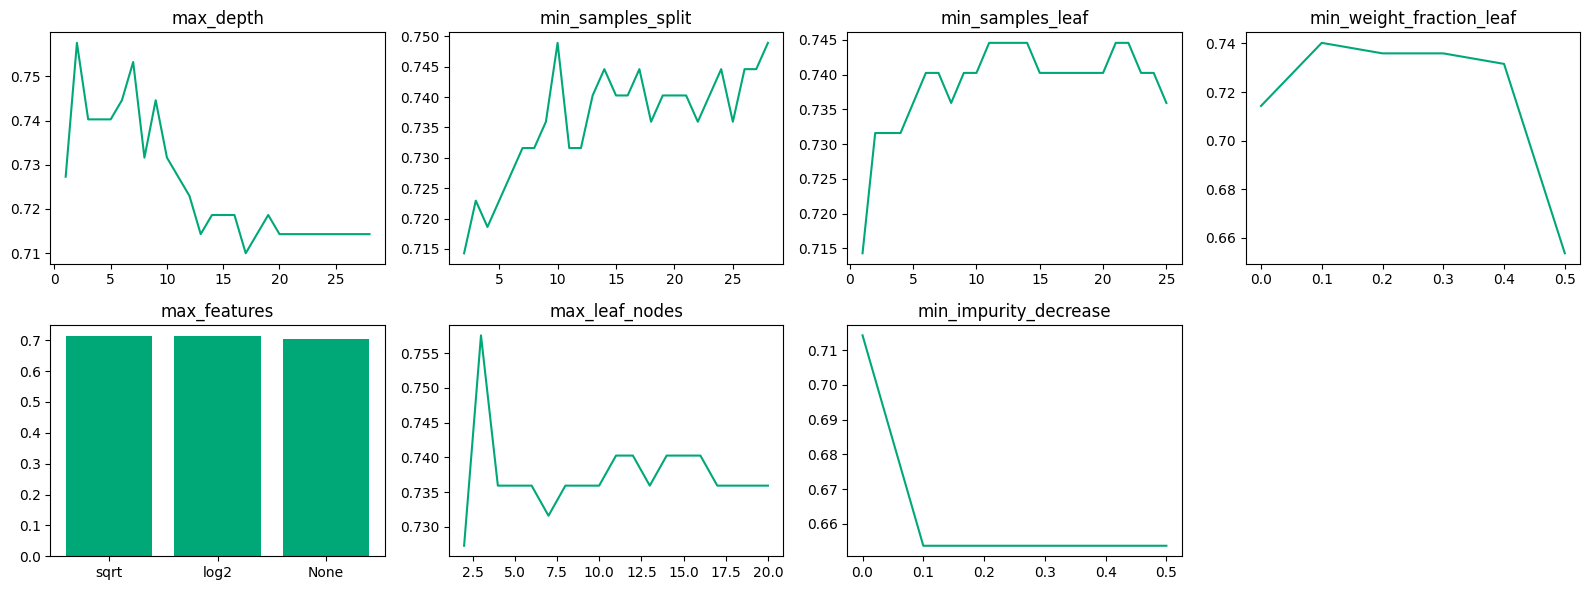

In [115]:
from sklearn.ensemble import RandomForestClassifier

params_dict = {
    'max_depth': range(1, 29),
    'min_samples_split': range(2, 29),
    'min_samples_leaf': range(1, 26),
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    'max_features': ['sqrt', 'log2', None],
    'max_leaf_nodes': range(2, 21),
    'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
}

results = {}
best_params = {}

for hyperparameter in params_dict:
    best_accuracy, best_value = 0, None

    for value in params_dict[hyperparameter]:
        clf = RandomForestClassifier(random_state=42, **{hyperparameter: value})
        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_value = value

        if hyperparameter not in results:
            results[hyperparameter] = {'values': [], 'accuracy': []}

        results[hyperparameter]['values'].append(value)
        results[hyperparameter]['accuracy'].append(accuracy)

    best_params[hyperparameter] = best_value


fig, axes = plt.subplots(2, 4, figsize=(16, 6))
axes = axes.ravel()
for i, hyperparameter in enumerate(params_dict):
    if hyperparameter == 'max_features':
        continue
    values = results[hyperparameter]['values']
    accuracy = results[hyperparameter]['accuracy']
    axes[i].plot(values, accuracy)
    axes[i].set_title(hyperparameter)

axes[4].bar(['sqrt', 'log2', 'None'], results['max_features']['accuracy'])
axes[4].set_title('max_features')

fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

- max_depth

max_depth reaches its optimum value at 2, after which the accuracy decreases in jerky steps.

- min_samples_split

min_samples_split reaches its optimum value at 10, lower than the value of 24 used for the decision tree classifier.

- min_samples_leaf

min_samples_leaf results in the highest accuracy at 11. A close seems to be around 20, but the accuracy is slightly lower.

- min_weight_fraction_leaf

min_weight_fraction_leaf results in the highest accuracy at 0.1, after which the accuracy decreases. It is the same as the one from the decision tree classifier.

- max_features

The bar chart shows that the accuracy is highest for max_features set to _sqrt_, compared to _None_ from the DT model. Overall, for the other values, the accuracy is not extremely different, similar to the decision tree classifier.

- max_leaf_nodes

Its graph is not similar at all to the one of the decision tree classifier, comparing other hyperparameters. The accuracy is the highest for max_leaf_nodes = 3, after which the accuracy decreases and then alternates between increasing, decreasing and staying the same.

- min_impurity_decrease

The shape of the graph is almost the same as the one of the decision tree classifier. The accuracy is the highest for min_impurity_decrease = 0.0, after which the accuracy decreases.

In [116]:
best_params

{'max_depth': 2,
 'min_samples_split': 10,
 'min_samples_leaf': 11,
 'min_weight_fraction_leaf': 0.1,
 'max_features': 'sqrt',
 'max_leaf_nodes': 3,
 'min_impurity_decrease': 0.0}

### Model training

In [117]:
# Model with the default parameters
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.7142857142857143

In [118]:
# Model with the best parameters evaluated manually
clf = RandomForestClassifier(random_state=42, **best_params)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.7445887445887446

### Conclusion

For all hyperparameters, the lowest possible accuracy is around 0.65. Selecting the best hyperparamters lead to an increase in accuracy from 0.71 to 0.74.

For this dataset, Random Forest and Decision Tree classifiers perform similarly if the hyperparameters are tuned (manually). However, the RFC is more accurate than the DTC using the default hyperparameters.